import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torch.autograd import Variable

# make fake data
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
iris_d = pd.DataFrame(iris['data'], columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris_d['Species'] = iris.target

# 特征降维——主成分分析
transfer_1 = PCA(n_components=2)
iris_d = transfer_1.fit_transform(iris_d)
x = torch.from_numpy(iris_d)
y = torch.from_numpy(iris.target)
x, y = Variable(x), Variable(y)

# mehod
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 3),
)
# net1 = Net(n_feature=2, n_hidden=10, n_output=3)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 随机梯度下降
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

for t in range(150):
    out = net(x.float())  # input x and predict based on x
    loss = loss_func(out, y.long())  # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()  # clear gradients for next train
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.show()
torch.save(net, 'net.pkl')  # save entire net
torch.save(net.state_dict(), 'net_params.pkl')  # save only the parameters
net1 = torch.load('net.pkl')  # 加载神经网络


In [51]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from torch.autograd import Variable

# make fake data
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
iris_d = pd.DataFrame(iris['data'], columns=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris_d['Species'] = iris.target

# 特征降维——主成分分析
transfer_1 = PCA(n_components=2)
iris_d = transfer_1.fit_transform(iris_d)
x = torch.from_numpy(iris_d)
y = torch.from_numpy(iris.target)
x, y = Variable(x), Variable(y)

# mehod
net = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 3),
)
# net1 = Net(n_feature=2, n_hidden=10, n_output=3)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 随机梯度下降
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=3, bias=True)
)


In [59]:
len(iris.target)

150

In [82]:
a = np.array([[0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [1,1,1,1],
              [1,1,1,1],
              [1,1,1,1],
              [1,1,1,1],
              [1,1,1,1],
              [1,1,1,1],
              [1,1,1,1],
              [1,1,1,1],
              [1,1,1,1],
              [1,1,1,1],
              [2,2,2,2],
              [2,2,2,2],
              [2,2,2,2],
              [2,2,2,2],
              [2,2,2,2],
              [2,2,2,2],
              [2,2,2,2],
              [2,2,2,2],
              [2,2,2,2],
              [2,2,2,2],
              [3,3,3,3],
             [3,3,3,3],
             [3,3,3,3],
             [3,3,3,3],
             [3,3,3,3],
             [3,3,3,3],
             [3,3,3,3],
             [3,3,3,3],
             [3,3,3,3],
             [3,3,3,3]])
b = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3])


# 特征降维——主成分分析
transfer_1 = PCA(n_components=4)
a = transfer_1.fit_transform(a)
x = torch.from_numpy(a)
y = torch.from_numpy(b)
x, y = Variable(x), Variable(y)
print(x.shape, y.shape)

torch.Size([40, 4]) torch.Size([40])


Sequential(
  (0): Linear(in_features=4, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=4, bias=True)
)
0.25


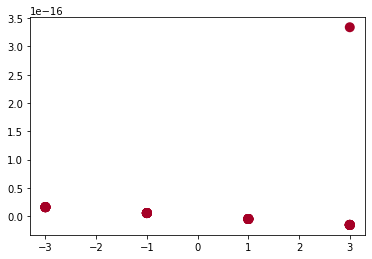

0.5


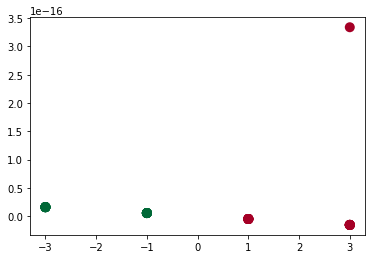

0.5


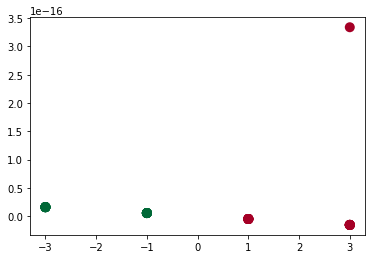

1.0


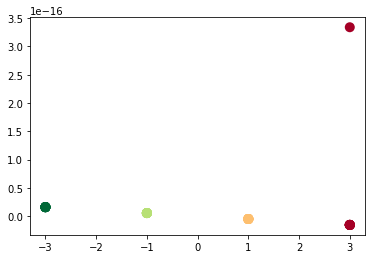

1.0


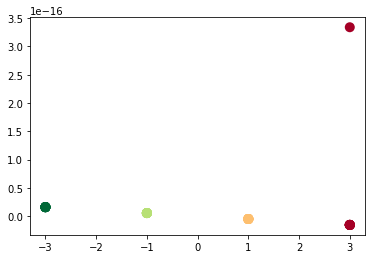

1.0


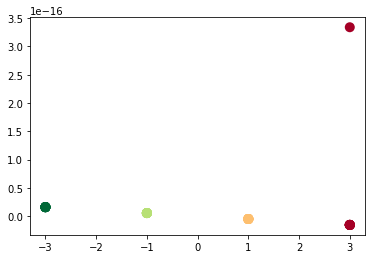

1.0


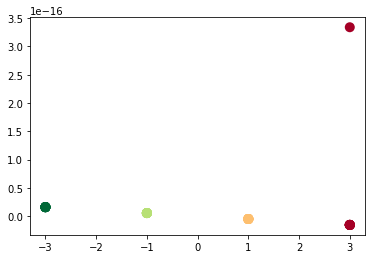

1.0


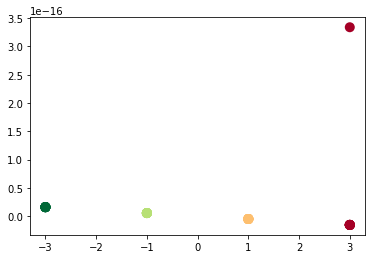

1.0


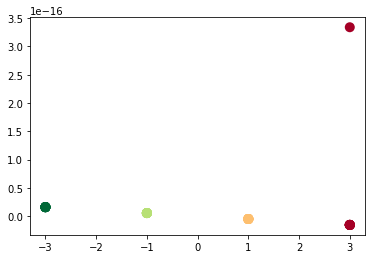

1.0


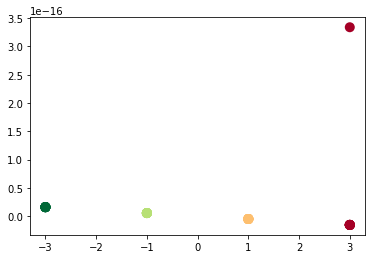

1.0


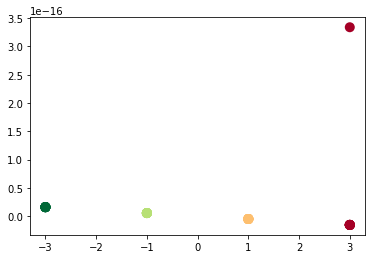

1.0


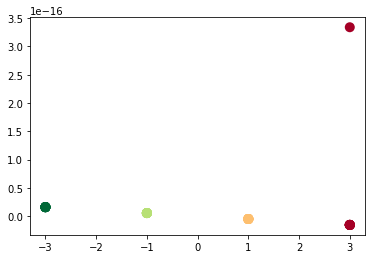

1.0


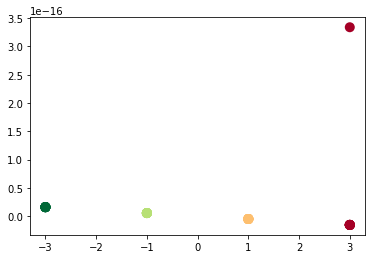

1.0


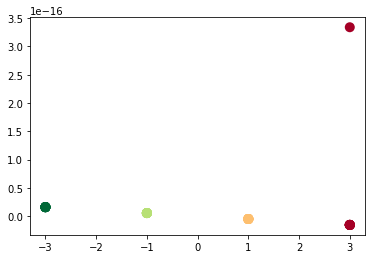

1.0


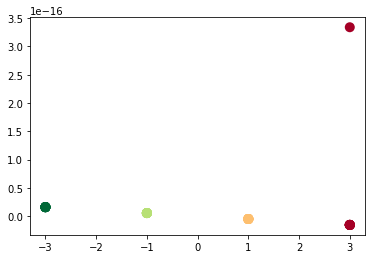

In [83]:


# mehod
net = torch.nn.Sequential(
    torch.nn.Linear(4, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 4),
)
# net1 = Net(n_feature=2, n_hidden=10, n_output=3)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # 随机梯度下降
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

for t in range(150):
    out = net(x.float())  # input x and predict based on x
    loss = loss_func(out, y.long())  # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()  # clear gradients for next train
    loss.backward()  # backpropagation, compute gradients
    optimizer.step()  # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        print(accuracy)

        plt.pause(0.1)

plt.show()
torch.save(net, 'net.pkl')  # save entire net
torch.save(net.state_dict(), 'net_params.pkl')  # save only the parameters
net1 = torch.load('net.pkl')  # 加载神经网络
